In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from numpy.polynomial.polynomial import polyfit, polyval

Importando Data Frame de Radiación Solar 2020

In [70]:
df = pd.read_csv("rad_2020.csv")

Convertir la columna "Date" en formatp datetime

In [71]:
df['Date'] = pd.to_datetime(df['Date'])

Calculando Máximo, Mínimo, Media por hora

In [72]:
#Máximos
max_por_hora = df.groupby(df['Date'].dt.hour)['value'].max()

#Minimos
min_por_hora = df.groupby(df['Date'].dt.hour)['value'].min()

#Media
media =  df.groupby(df['Date'].dt.hour)['value'].mean()

Graficando Máximo, Mínimo, Media por hora

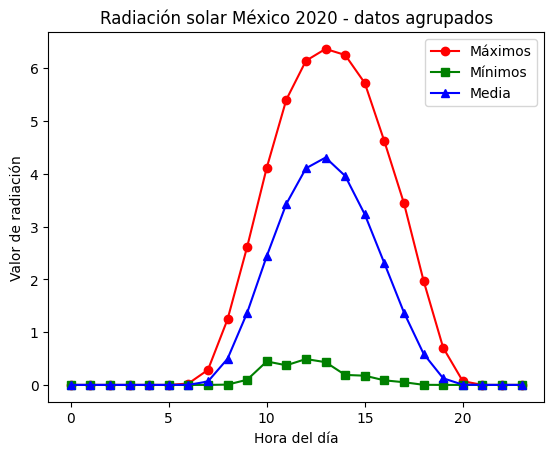

In [73]:
# Figura con un solo eje
fig, ax = plt.subplots()

# Máximos en rojo con círculos
ax.plot(max_por_hora.index, max_por_hora.values, 'ro-', label='Máximos')

# Mínimos en verde con cuadrados
ax.plot(min_por_hora.index, min_por_hora.values, 'gs-', label='Mínimos')

# Media en azul con triángulos
ax.plot(media.index, media.values, 'b^-', label='Media')

# Etiquetas al eje X y al eje Y
ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de radiación')

# Titulo
ax.set_title('Radiación solar México 2020 - datos agrupados')

# Leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

Calculando la Varianza y el Intervalo de confianza al 95%

In [74]:
varianza = df.groupby(df['Date'].dt.hour)['value'].var()

n = df.groupby(df.Date.dt.hour)['value'].count()
std = np.sqrt(varianza)
t = stats.t.ppf(1-0.05/2, n-1)
ci_upper = df.groupby(df["Date"].dt.hour)['value'].mean() + t*std/np.sqrt(n)
ci_lower = df.groupby(df["Date"].dt.hour)['value'].mean() - t*std/np.sqrt(n)

Graficando el Limite Superior e Inferiror del Intervalo de Confianza, junto con la media.

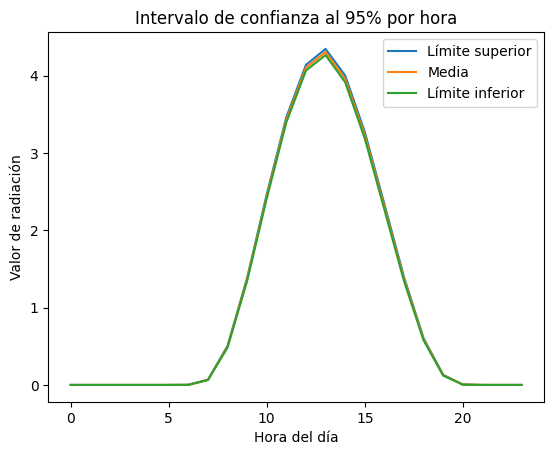

In [75]:
fig, ax = plt.subplots()

ax.plot(ci_upper.index, ci_upper, label='Límite superior')
ax.plot(media.index, media.values, label='Media')
ax.plot(ci_lower.index, ci_lower, label='Límite inferior')

ax.set_xlabel('Hora del día')
ax.set_ylabel('Valor de radiación')

ax.set_title('Intervalo de confianza al 95% por hora')
ax.legend()

plt.show()

Mostrando Valores en una tabla

In [76]:
tabla = pd.DataFrame({'Hora': max_por_hora.index, 'Maximos' : max_por_hora.values, 'Minimos' : min_por_hora, 'Media': media.values, 'Varianza' : varianza.values, 'Intervalo de confianza inferior': ci_upper, 'Intervalo de confianza superior': ci_lower})

# Mostrar tabla
print(tabla)

      Hora  Maximos  Minimos     Media  Varianza  \
Date                                               
0        0   0.0000   0.0000  0.000000  0.000000   
1        1   0.0000   0.0000  0.000000  0.000000   
2        2   0.0000   0.0000  0.000000  0.000000   
3        3   0.0000   0.0000  0.000000  0.000000   
4        4   0.0000   0.0000  0.000000  0.000000   
5        5   0.0000   0.0000  0.000000  0.000000   
6        6   0.0265   0.0000  0.001266  0.000015   
7        7   0.2840   0.0000  0.065013  0.005235   
8        8   1.2420   0.0060  0.494749  0.084516   
9        9   2.6140   0.0980  1.366258  0.269624   
10      10   4.1150   0.4450  2.439766  0.514421   
11      11   5.4050   0.3720  3.430821  0.726557   
12      12   6.1410   0.4900  4.103785  0.923112   
13      13   6.3650   0.4310  4.306841  1.091456   
14      14   6.2500   0.1895  3.959217  1.276469   
15      15   5.7190   0.1750  3.230923  1.195822   
16      16   4.6150   0.0870  2.304523  0.866057   
17      17  

Calculando regresión polinomial de grado 6

In [87]:
x = df.groupby(df['Date'].dt.hour)['value'].mean().index
y = df.groupby(df['Date'].dt.hour)['value'].mean().values
coefs = polyfit(x, y, 6)

Graficano Regresión Polinomial

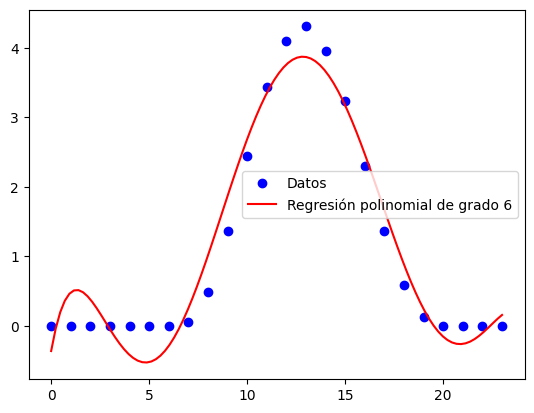

In [88]:
xp = np.linspace(0, 23, 100)
yp = polyval(xp, coefs)
ax.plot(xp, yp, 'r-', label='Regresión polinomial de grado 6')
plt.plot(x, y, 'bo', label='Datos')
plt.plot(xp, yp, 'r-', label='Regresión polinomial de grado 6')
plt.legend()
plt.show()

Calculando los máximos y mínimos por día y hora

In [89]:
df.set_index('Date', inplace=True)

#Obteniendo máximo y agrupandolos con resample()
max_por_hora = df.resample('H').max()['value']

#Oteniedo minimos
min_por_hora = df.resample('H').min()['value']

Gráficando Máximos y Mínimos por día y hora

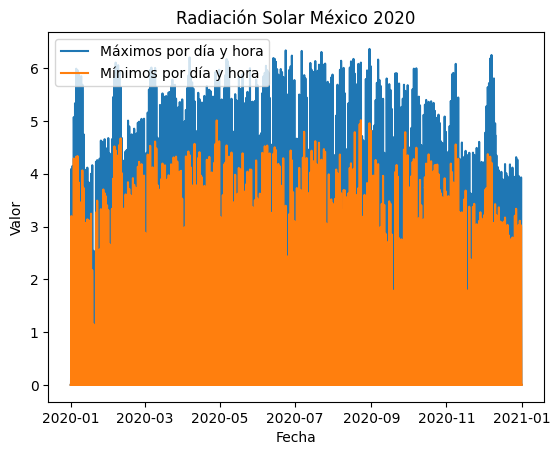

In [90]:
fig, ax = plt.subplots()
ax.plot(max_por_hora, label="Máximos por día y hora")
ax.plot(min_por_hora, label="Mínimos por día y hora")
ax.legend()
ax.set_xlabel("Fecha")
ax.set_ylabel("Valor")
ax.set_title('Radiación Solar México 2020')
plt.show()